In [30]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
# Assuming `df` is your DataFrame and the target variable is named "target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Initialize the neural network
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification (using sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5347 - loss: 0.7388 - val_accuracy: 0.7464 - val_loss: 0.6325
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5856 - loss: 0.6678 - val_accuracy: 0.8188 - val_loss: 0.5721
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6866 - loss: 0.6139 - val_accuracy: 0.8478 - val_loss: 0.5146
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.5546 - val_accuracy: 0.8696 - val_loss: 0.4502
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7978 - loss: 0.4752 - val_accuracy: 0.8696 - val_loss: 0.3968
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.4209 - val_accuracy: 0.8623 - val_loss: 0.3662
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8365 - loss: 0.4031 - val_accuracy: 0.8841 - val_loss: 0.3507
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8246 - loss: 0.4120 - val_accuracy: 0.8841 - val_loss

In [28]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 0.8695652173913043
Confusion Matrix:
[[79  8]
 [10 41]]


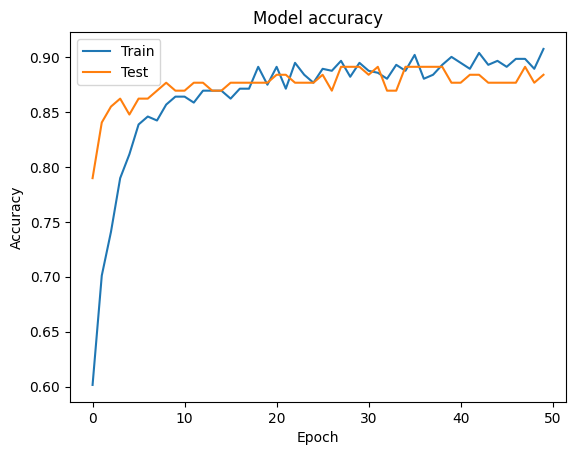

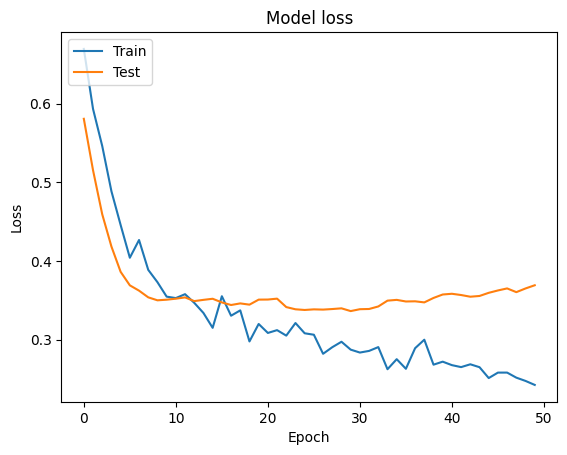

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()